<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 3. Математика для data sciense. Нетология.

Решить систему линейных уравнений:

![alt text](https://italiandirectory.eu/wp-content/ql-cache/quicklatex.com-34a5602e13176cbddcfd35cca34478fe_l3.svg)

In [1]:
import numpy as np

In [2]:
A = [[2, 1, 1], [1, 3, 2], [1, 0, 0]]
b = [4, 5, 6]
x = np.linalg.solve(A, b)
x

array([  6.,  15., -23.])

Анна выбирает тарифный план для телефонной связи. Первый план, T1, стоит 20 долларов в месяц, каждый звонок стоит 25 центов в минуту. Второй тарифный план, T2, стоит 40долларов в месяц, но звонки стоят 8 центов в минуту. Какой план ей выбрать, если Анна звонит не более 117 минут в месяц?

Составим задачу в системе линейных уравнений. 

Количество минут - независимая переменная, будет нашим x. Стоимость тарифа - зависимая величина, будет нашим y. 

Написать систему уравнений для данной задачи, построить график, найти точку пересечения прямых. 
Сделать вывод о том, какой тариф использовать лучше для Анны.

**Напишем нашу систему уравнений.**

$$ y = 20 + 0.25\cdot x $$
$$ y = 25 + 0.08\cdot x $$

**Построим график**

In [47]:
y1 = lambda x: 20 + 0.25*x
y2 = lambda x: 25 + 0.08*x
x = np.linspace(0, 150, 500)

In [48]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

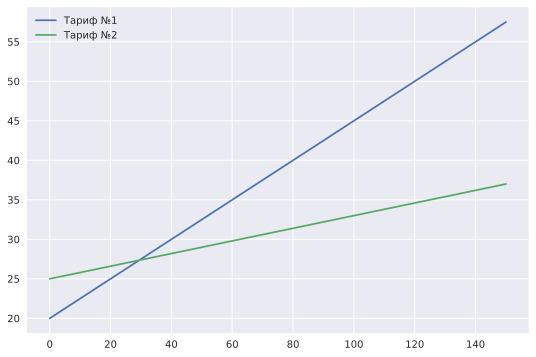

In [49]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(9,6))
    plt.plot(x, y1(x))
    plt.plot(x, y2(x))
    plt.legend(['Тариф №1', 'Тариф №2'])

**Найдем точку пересечения:**

In [50]:
A = [[0.25, -1], [0.08, -1]]
b = [-20, -25]
solve = np.linalg.solve(A, b)
solve

array([29.41176471, 27.35294118])

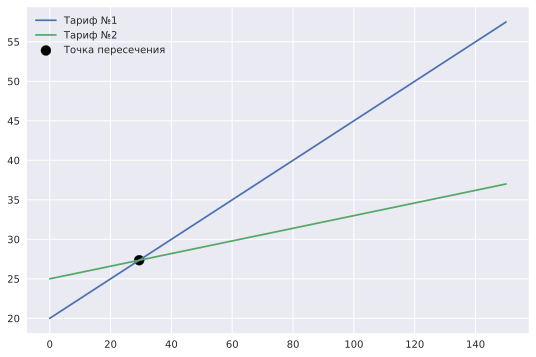

In [62]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(9,6))
    plt.plot(x, y1(x))
    plt.plot(x, y2(x))
    plt.scatter(solve[0], solve[1], s=100, color='k', marker='o')
    plt.legend(['Тариф №1', 'Тариф №2', 'Точка пересечения'])

**Т.о. для Анны тариф №1 будет более выгоден, если она будет говорить менее 30 минут в месяц и если более то тариф №2.** 

Загрузить датасет Boston houses. 
Выбрать 3-хмерное пространство (3 атрибута из таблицы), взять 3 дома по данному трехмерному пространству, доказать, что данные векторы не компланарны.

**Если они компланарны, то определитель должнен быть равен нулю. Проверим.**

In [64]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()

In [65]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

In [66]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [190]:
x1 = boston.data[20] # дом 1
x2 = boston.data[130] # дом 2
x3 = boston.data[200] # дом 3

**Возьмем первые 3 атрибута.**

In [191]:
x1[:3], x2[:3], x3[:3]

(array([1.25179, 0.     , 8.14   ]),
 array([ 0.34006,  0.     , 21.89   ]),
 array([1.778e-02, 9.500e+01, 1.470e+00]))

In [192]:
det = np.concatenate([x1[:3], x2[:3]])
det = np.concatenate([det, x3[:3]])
det = det.reshape(3, 3).T

**Проверим равенство нулю определителя:**

In [193]:
np.allclose(np.linalg.det(det), 0)

False

**Таким образом, видно, что векторы некомпланарны.**

Для матрицы, полученной на предыдущей задачи, посчитать собственный вектор(v). Умножить собственный вектор на матрицу (Av). Сделать график. Во сколько раз Av отличается от v?

**Возьмем второй собст. вектор.**

In [299]:
v = np.linalg.eig(det)[1][:, 1]

**Пусть А - матрица трансформации.**

In [300]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [301]:
Av = det.dot(v)

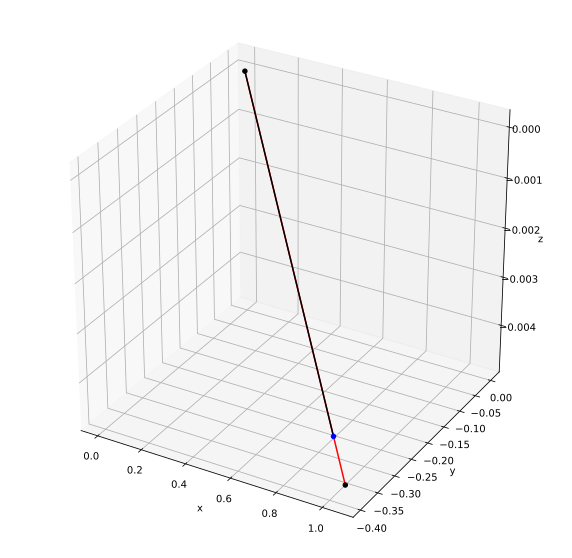

In [303]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.plot([0,Av[0]], [0,Av[1]], [0,Av[2]], c='r')
ax.plot([0,v[0]], [0,v[1]], [0,v[2]], c='k')

ax.scatter(v[0], v[1], v[2], c='b', marker='o')
ax.scatter(Av[0], Av[1], Av[2], c='k', marker='o')
ax.scatter(0, 0, 0, c='k', marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [307]:
print('Av больше v в {:.3f} раз.'.format((Av/v)[0]))

Av больше v в 1.125 раз.


**Посмотрим отношение Av на v.**

In [118]:
Av/v

array([[ 46.40843251,   1.12528081, -44.81192332],
       [ 46.40843251,   1.12528081, -44.81192332],
       [ 46.40843251,   1.12528081, -44.81192332]])

Задание повышенного уровня.

Как посчитать интеграл полинома, полученного в домашнем задании №2, при полиномиальной регрессии?

In [321]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target
  
x = boston.LSTAT

x = np.array(x).reshape(-1, 1)
y = price

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression()
model = lin2.fit(X_poly, y)

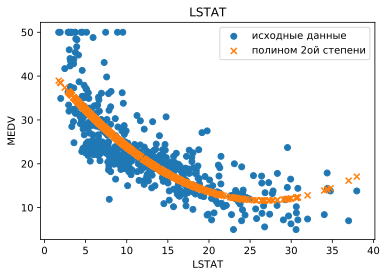

In [322]:
y_pred = model.predict(poly.fit_transform(x))
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='x')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени'])
plt.show()

### Восстановим нашу функцию по коэффициентам.

In [318]:
f = lambda x: model.coef_[1]*x + model.coef_[2]*x**2 + model.intercept_

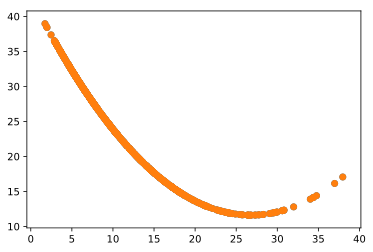

In [330]:
plt.scatter(x, f(x))
plt.scatter(x, y_pred)

In [338]:
np.allclose(f(x), y_pred.reshape(-1,1))

True

**Видно, что это одна и та же ф-ия. Теперь найдем ее интеграл на отрезке х.**

In [342]:
from scipy import integrate

**Можно использовать готовую ф-ию из scipy: integrate, но также можно реализовать свою ф-ию, например, на основе метода Симпсона.**

In [343]:
def method_of_simpson(integrand, a, b, dubn):
    """ 
    Вычисляет приближенное значение интеграла с помощью формулы трапеций,
    а также точное решенение данного интеграла и ошибку измерения.
    integrand - подынтегральная функция
    a, b - пределы интегрирования
    dubn - количество частичных отрезков
    """
    approximate_solution_list = []
    step = float(b - a)/dubn
    approximate_solution = integrand(a) + integrand(b)
    approximate_solution_list.append(approximate_solution)
    
    x1 = a + step 
    x2 = a + 2*step
    for i in range(1, dubn+1):
        if (i//2)*2 == i:
            approximate_solution += 4*integrand(x1)
            approximate_solution_list.append(integrand(x1))
            x1 += 2*step
        else:
            approximate_solution += 2*integrand(x2)
            approximate_solution_list.append(integrand(x2))
            x2 += 2*step
            
    approximate_solution *= step/3
    exact_solution = integrate.quad(integrand, a, b)[0]

    error = approximate_solution - exact_solution
    return print(
                'Приближенное решение: {}, Точное решение: {}, Ошибка приближения: {}, Koличество частичных отрезков: {}'
                 .format(approximate_solution, exact_solution, abs(error), dubn)
                ),\
                  approximate_solution_list, abs(error)

**Интегрируем в пределах нашего x.**

In [351]:
simpson_sol = method_of_simpson(f, x[0], x[-1], 500)

Приближенное решение: [86.21460196], Точное решение: 86.10949283462385, Ошибка приближения: [0.10510913], Koличество частичных отрезков: 500


In [352]:
simpson_sol = method_of_simpson(f, x[0], x[-1], 1000)

Приближенное решение: [86.1620474], Точное решение: 86.10949283462385, Ошибка приближения: [0.05255456], Koличество частичных отрезков: 1000


In [353]:
simpson_sol = method_of_simpson(f, x[0], x[-1], 5000)

Приближенное решение: [86.12000375], Точное решение: 86.10949283462385, Ошибка приближения: [0.01051091], Koличество частичных отрезков: 5000


### Чем больше отрезков разбиения, тем более точный мы получаем ответ.